In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn import datasets
import torch.nn as nn
torch.manual_seed(4)

In [ ]:
# Source: https://archive.ics.uci.edu/ml/datasets/heart+disease
url = "https://raw.githubusercontent.com/mkrkelj1/data/main/heart-disease-cleveland.csv"

df = pd.read_csv(url, usecols=["age", "trestbps", "chol", "thalach", "oldpeak", "num_binary"])
df = (df-df.min())/(df.max()-df.min()) # Normalize the data (min-max norm)
df.head()

,age,trestbps,chol,thalach,oldpeak,num_binary
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0
1,0.791667,0.622642,0.365297,0.282443,0.241935,1.0
2,0.791667,0.245283,0.235160,0.442748,0.419355,1.0
3,0.166667,0.339623,0.283105,0.885496,0.564516,0.0
4,0.250000,0.339623,0.178082,0.770992,0.225806,0.0


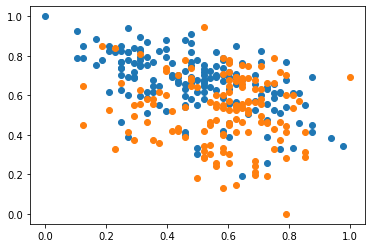

In [ ]:
x_values = np.column_stack((df.age, df.thalach)) # Convert two arrays into a 2-d matrix:
y_values = df.num_binary.to_numpy()

plt.scatter(x_values[y_values==0, 0], x_values[y_values==0, 1])
plt.scatter(x_values[y_values==1, 0], x_values[y_values==1, 1])

In [ ]:
class PerceptronModel(nn.Module):
    # This time dimensions are 2x1 (2 inputs and 1 output)
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
      prediction = torch.sigmoid(self.linear(x))
      return prediction

In [ ]:
perceptron = PerceptronModel(2, 1)
[weights, bias] = perceptron.parameters() # Unpack the weights & bias.

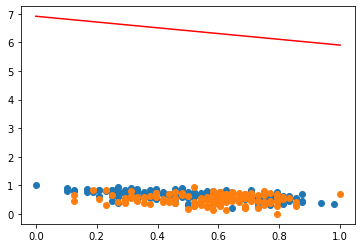

In [ ]:
# Get the value out of the tensor
w1 = weights[0][0].item() 
w2 = weights[0][1].item()
b1 = bias[0].item()

x1 = np.array([0, 1]) # Because our normalized data goes from 0 to 1.
x2 = (w1 * x1 + b1) / -w2 # Solve for x2: 0 = w1*x1 + w2*x2 + b1

plt.plot(x1, x2, 'r')
plt.scatter(x_values[y_values==0, 0], x_values[y_values==0, 1])
plt.scatter(x_values[y_values==1, 0], x_values[y_values==1, 1])

In [ ]:
# Make sure that both arrays have the same shape. Don't overwrite old variables.
y_values_reshaped = y_values.reshape(len(x_values), 1) 

# Make sure that our data are tensors!
X = torch.Tensor(x_values)
y = torch.Tensor(y_values_reshaped)

In [ ]:
criterion = nn.BCELoss() # Loss function: binary cross entropy.
optimizer = torch.optim.SGD(perceptron.parameters(), lr = 0.1)
epochs = 1000 
 
losses = []

for i in range(epochs):
  optimizer.zero_grad() # Zero out the gradients for every epoch.
  y_pred = perceptron.forward(X) # For every sample in X, we make a prediction with the forward function.
  loss = criterion(y_pred, y) # Compute the loss between the prediction and samples
  losses.append(loss.item())
  #print("epoch:", i, "loss:", loss.item(), "w1:", _w1, "w2:", _w2, "b1:", _b1)
  loss.backward()
  optimizer.step()

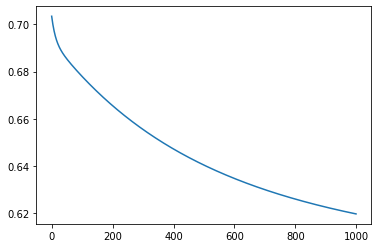

In [ ]:
plt.plot(range(epochs), losses)

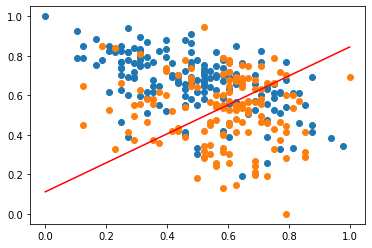

In [ ]:

w1 = weights[0][0].item() 
w2 = weights[0][1].item()
b1 = bias[0].item()

x1 = np.array([0, 1]) # Because our normalized data only goes from 0 to 1.
x2 = (w1 * x1 + b1) / -w2 # 0 = w1*x1 + w2*x2 + b1

plt.plot(x1, x2, 'r')
plt.scatter(x_values[y_values==0, 0], x_values[y_values==0, 1])
plt.scatter(x_values[y_values==1, 0], x_values[y_values==1, 1])